In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

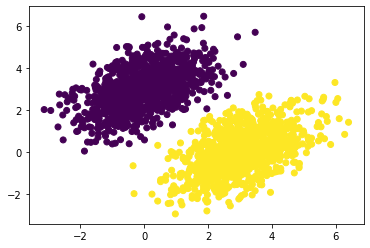

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype("float32")
targets = np.vstack((
    np.zeros((num_samples_per_class, 1)),
    np.ones((num_samples_per_class, 1))
))


plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [3]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim, )))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

2021-12-27 21:56:58.506665: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-27 21:56:58.506716: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pw): /proc/driver/nvidia/version does not exist
2021-12-27 21:56:58.507610: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [8]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0259
Loss at step 1: 0.0258
Loss at step 2: 0.0256
Loss at step 3: 0.0255
Loss at step 4: 0.0254
Loss at step 5: 0.0253
Loss at step 6: 0.0253
Loss at step 7: 0.0252
Loss at step 8: 0.0251
Loss at step 9: 0.0251
Loss at step 10: 0.0250
Loss at step 11: 0.0249
Loss at step 12: 0.0249
Loss at step 13: 0.0249
Loss at step 14: 0.0248
Loss at step 15: 0.0248
Loss at step 16: 0.0247
Loss at step 17: 0.0247
Loss at step 18: 0.0247
Loss at step 19: 0.0247
Loss at step 20: 0.0246
Loss at step 21: 0.0246
Loss at step 22: 0.0246
Loss at step 23: 0.0246
Loss at step 24: 0.0246
Loss at step 25: 0.0246
Loss at step 26: 0.0245
Loss at step 27: 0.0245
Loss at step 28: 0.0245
Loss at step 29: 0.0245
Loss at step 30: 0.0245
Loss at step 31: 0.0245
Loss at step 32: 0.0245
Loss at step 33: 0.0245
Loss at step 34: 0.0245
Loss at step 35: 0.0245
Loss at step 36: 0.0245
Loss at step 37: 0.0245
Loss at step 38: 0.0244
Loss at step 39: 0.0244


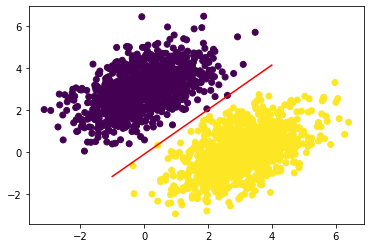

In [10]:
x = np.linspace(-1, 4, 100)
# 0.5 = W[0] * x + W[1] * y + b
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
predictions = model(inputs)

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)